## Datathon-2:
As per WHO,
- Cancer is the second leading cause of death globally, and is responsible for an estimated 9.6 million deaths in 2018. Globally, about 1 in 6 deaths is due to cancer.
- Approximately 70% of deaths from cancer occur in low- and middle-income countries.
- Around one third of deaths from cancer are due to the 5 leading behavioral and dietary risks: high body mass index, low fruit and vegetable intake, lack of physical activity, tobacco use, and alcohol use.

### Problem Statement

Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

### Data
The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
- avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
- avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
- incidenceRate: Mean per capita (100,000) cancer diagoses(a)
- medianIncome: Median income per county (b)
- popEst2015: Population of county (b)
- povertyPercent: Percent of populace in poverty (b)
- studyPerCap: Per capita number of cancer-related clinical trials per county (a)
- binnedInc: Median income per capita binned by decile (b)
- MedianAge: Median age of county residents (b)
- MedianAgeMale: Median age of male county residents (b)
- MedianAgeFemale: Median age of female county residents (b)
- Geography: County name (b)
- AvgHouseholdSize: Mean household size of county (b)
- PercentMarried: Percent of county residents who are married (b)
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
- PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
- PctPrivateCoverage: Percent of county residents with private health coverage (b)
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
- PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
- PctWhite: Percent of county residents who identify as White (b)
- PctBlack: Percent of county residents who identify as Black (b)
- PctAsian: Percent of county residents who identify as Asian (b)
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
- PctMarriedHouseholds: Percent of married households (b)
- BirthRate: Number of live births relative to number of women in county (b)

    (a): years 2010-2016
    
    (b): 2013 Census Estimates

## Taks 1

### Import Libraries

In [4]:
# !pip install scikit-learn==0.23.1
# !pip install boruta==0.3

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data and display first 5 rows.

In [130]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Basic Exploratory Data Analysis

In [131]:
cancer_data.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.923935,0.093793,0.292551,0.907281,-0.153511,0.070595,-0.018056,-0.117826,-0.118879,...,0.217377,-0.184398,-0.110135,-0.134860,0.033512,0.440741,0.207671,-0.095842,-0.028986,-0.130745
avgDeathsPerYear,0.923935,1.000000,0.083217,0.244401,0.971384,-0.078702,0.064497,-0.016642,-0.149103,-0.146657,...,0.176008,-0.143982,-0.041234,-0.190650,0.092127,0.456169,0.213360,-0.161171,-0.070212,-0.074008
incidenceRate,0.093793,0.083217,1.000000,-0.006377,0.046802,0.018940,0.064139,0.015603,-0.001209,0.004629,...,0.149924,0.065979,0.062519,-0.031335,0.118791,0.002370,-0.204575,-0.155923,-0.113258,0.467683
medIncome,0.292551,0.244401,-0.006377,1.000000,0.269641,-0.793994,0.041672,0.000035,-0.089085,-0.150649,...,0.746149,-0.753168,-0.723002,0.174797,-0.268332,0.450907,0.087813,0.448764,-0.005879,-0.433311
popEst2015,0.907281,0.971384,0.046802,0.269641,1.000000,-0.083109,0.059083,-0.013029,-0.187828,-0.191556,...,0.186544,-0.186896,-0.064535,-0.201226,0.086081,0.499890,0.244680,-0.128920,-0.054911,-0.111470
povertyPercent,-0.153511,-0.078702,0.018940,-0.793994,-0.083109,1.000000,-0.052453,-0.039496,-0.207178,-0.140043,...,-0.677633,0.649896,0.797798,-0.508448,0.514195,-0.163345,0.038812,-0.606798,-0.037040,0.427118
studyPerCap,0.070595,0.064497,0.064139,0.041672,0.059083,-0.052453,1.000000,-0.027554,-0.040006,-0.036666,...,0.092621,-0.060247,-0.067500,0.017619,-0.014936,0.065682,-0.024420,-0.045476,0.008558,-0.023890
MedianAge,-0.018056,-0.016642,0.015603,0.000035,-0.013029,-0.039496,-0.027554,1.000000,0.107618,0.113412,...,-0.016232,0.027074,-0.021316,0.029777,-0.005716,-0.024078,-0.028023,0.031896,0.000633,0.002772
MedianAgeMale,-0.117826,-0.149103,-0.001209,-0.089085,-0.187828,-0.207178,-0.040006,0.107618,1.000000,0.929571,...,-0.232712,0.402511,0.010843,0.380859,-0.240541,-0.245138,-0.274713,0.216806,-0.086324,-0.002006
MedianAgeFemale,-0.118879,-0.146657,0.004629,-0.150649,-0.191556,-0.140043,-0.036666,0.113412,0.929571,1.000000,...,-0.281330,0.463691,0.056223,0.314168,-0.158247,-0.264226,-0.279382,0.148140,-0.079924,0.034693


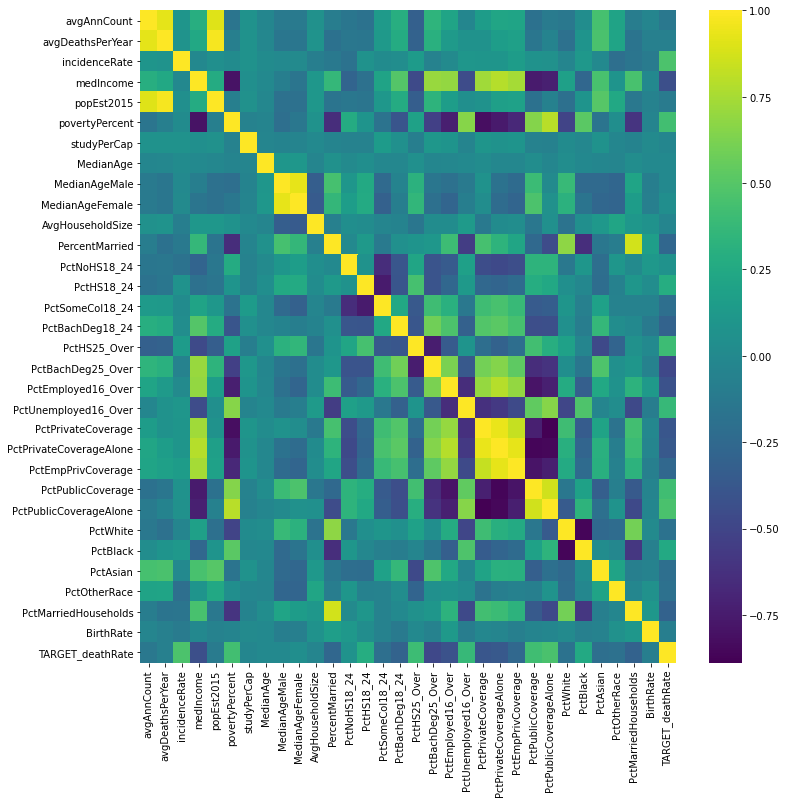

In [132]:
plt.figure(figsize=(12,12))
sns.heatmap(cancer_data.corr(), cmap='viridis')
plt.show()

In [133]:
cancer_data.corr()['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.467683
PctPublicCoverageAlone     0.456804
povertyPercent             0.427118
PctPublicCoverage          0.422291
PctHS25_Over               0.403449
PctUnemployed16_Over       0.379085
PctHS18_24                 0.284328
PctBlack                   0.250954
PctNoHS18_24               0.075815
MedianAgeFemale            0.034693
MedianAge                  0.002772
MedianAgeMale             -0.002006
studyPerCap               -0.023890
AvgHouseholdSize          -0.030288
avgDeathsPerYear          -0.074008
BirthRate                 -0.088322
popEst2015                -0.111470
avgAnnCount               -0.130745
PctWhite                  -0.173265
PctOtherRace              -0.189210
PctAsian                  -0.202352
PctSomeCol18_24           -0.206337
PctEmpPrivCoverage        -0.257117
PercentMarried            -0.262946
PctBachDeg18_24           -0.292220
PctMarriedHouseholds      -0.298414
PctPrivateCoverageAlone   -0

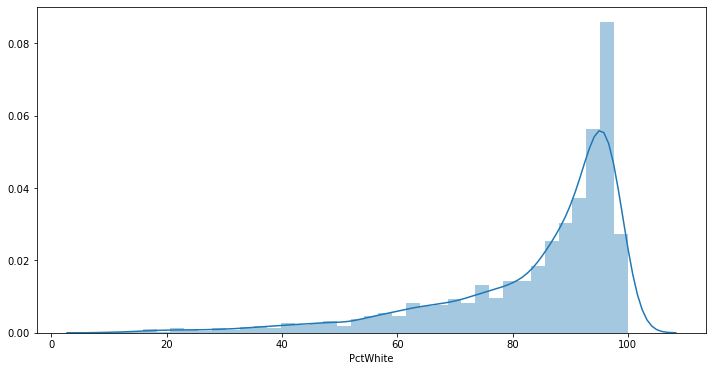

In [134]:
plt.figure(figsize=(12,6))
sns.distplot(cancer_data['PctWhite'])
plt.show()

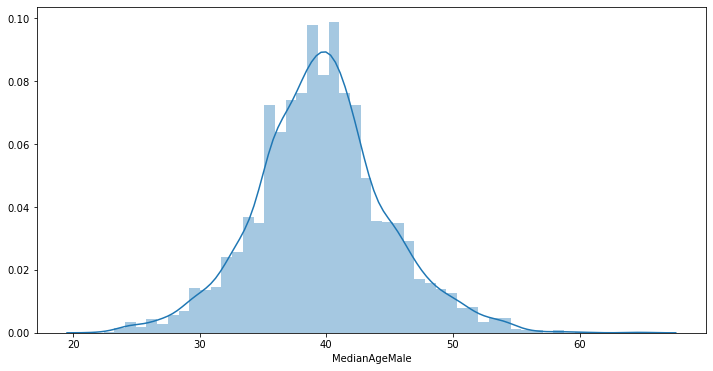

In [135]:
plt.figure(figsize=(12,6))
sns.distplot(cancer_data['MedianAgeMale'])
plt.show()

In [136]:
cancer_data.duplicated().sum()

766

There are 766 duplicate records

In [137]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [138]:
cancer_data.drop('binnedInc', axis=1, inplace=True)

In [139]:
cancer_data.drop('Geography', axis=1, inplace=True)

In [140]:
cancer_data.drop('PctSomeCol18_24', axis=1, inplace=True)

In [141]:
cancer_data['PctEmployed16_Over'].fillna(cancer_data['PctEmployed16_Over'].mean(), inplace=True)

In [142]:
cancer_data['PctPrivateCoverageAlone'].fillna(cancer_data['PctPrivateCoverageAlone'].mean(), inplace=True)

In [143]:
cancer_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

### Separate the Input and Target Features of the data

In [144]:
X = cancer_data.drop('TARGET_deathRate', axis=1)
y = cancer_data['TARGET_deathRate']

### Split the data into Train and Test Sets

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.1,
                                                   random_state=42)

### Scale your data if required

In [124]:
# from sklearn.preprocessing import StandardScaler
# scaled_features = StandardScaler().fit_transform(X)
# scaled_features = pd.DataFrame(data=scaled_features)
# scaled_features.columns = X.columns
# scaled_features.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.441214,-0.377556,0.614492,0.263441,-0.334186,-0.911813,-0.291749,0.105858,1.931532,0.793019,...,8.285162e-01,-0.604995,-0.204919,-1.544096,0.745879,-0.575265,-0.505820,-0.576512,1.709963,4.884323
1,-0.386029,-0.319125,0.699594,1.050046,-0.290210,-1.132653,-0.291749,-0.062111,0.328219,0.183798,...,4.756061e-15,1.014088,-0.540526,-1.062543,0.839234,-0.575603,-0.471744,-0.564031,1.576544,-1.184390
2,-0.300452,-0.209005,0.504805,-0.603497,-0.252826,0.255486,-0.291749,0.118778,1.603142,1.459354,...,4.756061e-15,-0.991002,1.744179,0.398723,0.841667,-0.600080,-0.332052,-0.551054,0.401948,0.399757
3,-0.363635,-0.271931,0.900057,-1.395227,-0.279078,1.769819,-0.291749,-0.002676,0.598657,0.564561,...,4.756061e-15,-1.838072,2.183049,2.291726,0.862262,-0.613644,-0.376372,-0.471341,-0.052529,-0.247593
4,-0.392427,-0.316878,-1.456323,-0.611563,-0.293057,0.081968,-0.291749,0.017997,0.502072,1.097629,...,4.756061e-15,-0.851611,0.866439,0.913487,-0.082651,-0.499679,-0.217740,1.975048,-0.121003,-0.875664


## Task 2

### Build a Linear Regression Model

In [154]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Evaluate your model with Mean Squared Error (MSE)

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mse)

print("Linear Regression Model MSE:", mse)
print("Linear Regression Model MAE:", mae)
print("Linear Regression Model RMS:", rms)

Linear Regression Model MSE: 335.2754981008773
Linear Regression Model MAE: 13.802422114027985
Linear Regression Model RMS: 18.31052970563324


### Build Random Forest Model

In [157]:
# Random Forest Model 1
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

### Evaluate your model with Mean Squared Error (MSE)

In [180]:
# Random Forest Model 1
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
rms = np.sqrt(mse)

print("Random Forest Model 1 MSE:", mse)
print("Random Forest Model 1 MAE:", mae)
print("Random Forest Model 1 RMS:", rms)

Random Forest Model 1 MSE: 181.5637977222222
Random Forest Model 1 MAE: 9.34361111111111
Random Forest Model 1 RMS: 13.474561132824409


In [160]:
# Random Forest Model 2
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(random_state=1, max_depth=5)
rfr2.fit(X_train, y_train)
y_pred_rfr2 = rfr2.predict(X_test)

In [167]:
# Random Forest Model 2
mse = mean_squared_error(y_test, y_pred_rfr2)
mae = mean_absolute_error(y_test, y_pred_rfr2)
rms = np.sqrt(mse)

print("Random Forest Model 2 MSE:", mse)
print("Random Forest Model 2 MAE:", mae)
print("Random Forest Model 2 RMS:", rms)

Random Forest Model 2 MSE: 330.5313377434116
Random Forest Model 2 MAE: 14.004925701502835
Random Forest Model 2 RMS: 18.180520832567247


In [164]:
# Random Forest Model 3
from sklearn.ensemble import RandomForestRegressor
rfr3 = RandomForestRegressor(random_state=2)
rfr3.fit(X_train, y_train)
y_pred_rfr3 = rfr3.predict(X_test)

In [168]:
# Random Forest Model 3
mse = mean_squared_error(y_test, y_pred_rfr3)
mae = mean_absolute_error(y_test, y_pred_rfr3)
rms = np.sqrt(mse)

print("Random Forest Model 3 MSE:", mse)
print("Random Forest Model 3 MAE:", mae)
print("Random Forest Model 3 RMS:", rms)

Random Forest Model 3 MSE: 189.14626817647053
Random Forest Model 3 MAE: 9.265718954248364
Random Forest Model 3 RMS: 13.753045778171122


### Build Decision Tree Model

In [176]:
# Decision Tree Model 1
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1, max_depth=5)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
rms = np.sqrt(mse)

print("Decision Tree Model 1 MSE:", mse)
print("Decision Tree Model 1 MAE:", mae)
print("Decision Tree Model 1 RMS:", rms)

Decision Tree Model 1 MSE: 496.3176286229344
Decision Tree Model 1 MAE: 16.24595773439644
Decision Tree Model 1 RMS: 22.278187283146142


In [177]:
# Decision Tree Model 2
from sklearn.tree import DecisionTreeRegressor
dtr2 = DecisionTreeRegressor(random_state=1, max_depth=10)
dtr2.fit(X_train, y_train)
y_pred_dtr2 = dtr2.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dtr2)
mae = mean_absolute_error(y_test, y_pred_dtr2)
rms = np.sqrt(mse)

print("Decision Tree Model 2 MSE:", mse)
print("Decision Tree Model 2 MAE:", mae)
print("Decision Tree Model 2 RMS:", rms)

Decision Tree Model 2 MSE: 345.58628779180924
Decision Tree Model 2 MAE: 13.22310156269948
Decision Tree Model 2 RMS: 18.58995125845706


In [179]:
# Decision Tree Model 3
from sklearn.tree import DecisionTreeRegressor
dtr3 = DecisionTreeRegressor(random_state=1, max_depth=15)
dtr3.fit(X_train, y_train)
y_pred_dtr3 = dtr3.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dtr3)
mae = mean_absolute_error(y_test, y_pred_dtr3)
rms = np.sqrt(mse)

print("Decision Tree Model 3 MSE:", mse)
print("Decision Tree Model 3 MAE:", mae)
print("Decision Tree Model 3 RMS:", rms)

Decision Tree Model 3 MSE: 442.12885704633817
Decision Tree Model 3 MAE: 12.039290589501293
Decision Tree Model 3 RMS: 21.026860370638747


In second case, the model is performing better than other two on test data.

## Task 3

### Perform Hyperparameter Tunning on Random Forest Model

In [181]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [20,25,30],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[4,6],
    'n_estimators' : [100,200]
}
rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   30.5s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [183]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [184]:
y_grid_search = grid_search.predict(X_test)

### Evaluate your model with Mean Squared Error (MSE)

In [185]:
mse = mean_squared_error(y_test, y_grid_search)
mae = mean_absolute_error(y_test, y_grid_search)
rms = np.sqrt(mse)

print("Grid Search MSE:", mse)
print("Grid Search MAE:", mae)
print("Grid Search RMS:", rms)

Grid Search MSE: 191.83957221870514
Grid Search MAE: 9.75357692209489
Grid Search RMS: 13.850616311872376


## Task 4

### Use any Feature Selection Technique and repeat Task 2 and Task 3

In [187]:
#!pip install Boruta

In [189]:
from boruta import BorutaPy

forest = RandomForestRegressor(random_state=1)
boruta_selector = BorutaPy(forest, n_estimators = 'auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
I

BorutaPy(estimator=RandomForestRegressor(n_estimators=74,
                                         random_state=RandomState(MT19937) at 0x169E28C5740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x169E28C5740, verbose=2)

In [190]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
No. of significant features:  27


In [191]:
# Displaying Feature rank wise
selected_rf_features = pd.DataFrame({'Features':list(X_train.columns),
                                     'Ranking': boruta_selector.ranking_
        
})
selected_rf_features.sort_values(by='Ranking')

,Features,Ranking
0,avgAnnCount,1
27,PctOtherRace,1
26,PctAsian,1
25,PctBlack,1
24,PctWhite,1
23,PctPublicCoverageAlone,1
22,PctPublicCoverage,1
21,PctEmpPrivCoverage,1
19,PctPrivateCoverage,1
18,PctUnemployed16_Over,1


In [192]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [194]:
forest_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs=-1)
forest_important.fit(X_important_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [213]:
y_important_pred = forest_important.predict(X_important_test)

mse = mean_squared_error(y_test, y_important_pred)
mae = mean_absolute_error(y_test, y_important_pred)
rms = np.sqrt(mse)

print("Boruta MSE:", mse)
print("Boruta MAE:", mae)
print("Boruta RMS:", rms)

Boruta MSE: 185.50004393111223
Boruta MAE: 9.211384313725482
Boruta RMS: 13.619840084638007


## Task 5 (Optional)

In [228]:
# !pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

Feature Importances :  [0.01175234 0.03021775 0.09345844 0.05040327 0.03728024 0.09389263
 0.00767548 0.01533181 0.00841267 0.02261301 0.01545351 0.02265224
 0.01199301 0.01906801 0.01768672 0.05902987 0.18722111 0.02150925
 0.03044712 0.03881485 0.0154326  0.01826313 0.01713819 0.02365203
 0.01792932 0.02824933 0.01599769 0.03320456 0.02111207 0.01410768]


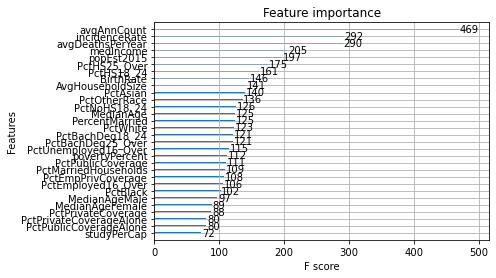

In [208]:
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

plot_importance(xgb_model)
plt.show()

In [217]:
from sklearn.feature_selection import SelectFromModel

selection=SelectFromModel(xgb_model)
selection.fit(X_train,y_train)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rms = np.sqrt(mse)

print("XGBRegressor Baseline MSE:", mse)
print("XGBRegressor Baseline MAE:", mae)
print("XGBRegressor Baseline RMS:", rms)

XGBRegressor Baseline MSE: 131.20952046640843
XGBRegressor Baseline MAE: 6.8369918723511525
XGBRegressor Baseline RMS: 11.454672429467742


In [229]:
predictions = selection_model.predict(select_X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rms = np.sqrt(mse) 

print("XGBRegressor Baseline MSE:", mse)
print("XGBRegressor Baseline MAE:", mae)
print("XGBRegressor Baseline RMS:", rms)

XGBRegressor Baseline MSE: 196.23808145857475
XGBRegressor Baseline MAE: 9.151360116597097
XGBRegressor Baseline RMS: 14.008500328678112


### Test Dataset

In [214]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [215]:
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,...,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,...,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,...,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


### Preprocessing Test Dataset

In [231]:
test_data.drop('binnedInc', axis=1, inplace=True)
test_data.drop('Geography', axis=1, inplace=True)
test_data.drop('PctSomeCol18_24', axis=1, inplace=True)
test_data['PctEmployed16_Over'].fillna(cancer_data['PctEmployed16_Over'].mean(), inplace=True)
test_data['PctPrivateCoverageAlone'].fillna(cancer_data['PctPrivateCoverageAlone'].mean(), inplace=True)

In [232]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [257]:
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,28.8,27.4,30.1,...,48.573314,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,41.5,40.9,42.1,...,40.100000,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,35.0,34.2,36.0,...,68.000000,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,44.7,44.2,45.5,...,55.300000,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,535.2,44.7,44.4,...,56.700000,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [233]:
# Boruta
X_test_data = boruta_selector.transform(np.array(test_data))
y_important_pred_data = forest_important.predict(X_test_data)

In [239]:
# Boruta
res = pd.DataFrame(y_important_pred_data)
res.index = test_data.index
res.columns=["prediction"]
res.to_csv("boruta_result.csv",index=False)

#### Boruta MSE is 405.3791393377685

In [258]:
#XGBRegressor
select_X_test_data = selection.transform(test_data)
predictions_xgb = selection_model.predict(select_X_test_data)

In [259]:
#XGBRegressor
res_XGB = pd.DataFrame(predictions_xgb)
res_XGB.index = test_data.index
res_XGB.columns=["prediction"]
res_XGB.to_csv("xgb_result.csv",index=False)

#### XGBRegressor MSE is 467.5843977659408

### Boruta Prediciton is still performing better than XGBRegressor

In [261]:
# Grid Search
predictions_grid_search = grid_search.predict(test_data)
res_grid = pd.DataFrame(predictions_grid_search)
res_grid.index = test_data.index
res_grid.columns=["prediction"]
res_grid.to_csv("gridsearch_result.csv",index=False)

#### Grid Search MSE is 401.88882717860616

### Grid Search Hyperparameter tuning is better than Boruta and XGB